#                                Project: Titanic Survival Exploration 2 

## Importando as bibliotecas para análise de dados e gráficos

In [1]:
# Bibliotecas numéricas
import numpy as np
import pandas as pd
# Definindo os algarismos significativos a serem apresentados nas tabelas.
pd.options.display.float_format = '{:.3f}'.format  

# Bibliotecas gráficas 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.rc('font',size=14)

## Carregando os dados e verificando o conteúdo.

In [2]:
df_train = pd.read_csv('data/train.csv')
df_infer = pd.read_csv('data/test.csv')

In [3]:
# Amostra da tabela de dados para treino
df_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.000,0,0,7552,10.517,NaN,S
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,nan,1,0,386525,16.100,NaN,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.000,0,0,4134,9.588,NaN,S
211,212,1,2,"Cameron, Miss. Clear Annie",female,35.000,0,0,F.C.C. 13528,21.000,NaN,S
431,432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,nan,1,0,376564,16.100,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.000,4,1,382652,29.125,NaN,Q
117,118,0,2,"Turpin, Mr. William John Robert",male,29.000,1,0,11668,21.000,NaN,S
572,573,1,1,"Flynn, Mr. John Irwin (""Irving"")",male,36.000,0,0,PC 17474,26.387,E25,S
815,816,0,1,"Fry, Mr. Richard",male,nan,0,0,112058,0.000,B102,S
765,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.000,1,0,13502,77.958,D11,S


In [4]:
# Amostra dos dados da tabela para inferencia.
df_infer.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000,0,0,240276,9.688,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.662,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.287,NaN,S


#### Identificando as colunas

* PassengerId: Número de identificação do passageiro;

* Survived: Indica se o passageiro sobreviveu ao desastre. É atribuído o valor de 0 para aqueles que não sobreviveram, e 1 para quem sobreviveu;

* Pclass: Classe na qual o passageiro viajou. É informado 1 para primeira classe; 2 para segunda; e 3 para terceira;

* Name: Nome do passageiro;

* Sex: Sexo do passageiro;

* Age: Idade do passageiro em anos;

* SibSp: Quantidade de irmãos e cônjuges a bordo ;

* Parch: Quantidade de pais e filhos a bordo;

* Ticket: Número da passagem;

* Fare: Preço da passagem;

* Cabin: Número da cabine do passageiro;

* Embarked: Porto no qual o passageiro embarcou. Há apenas três valores possíveis: Cherbourg, Queenstown e Southampton, indicados pelas letras “C”, “Q” e “S”, respectivamente.

## Análise exploratória dos dados.

In [5]:
# Verificando as dimensões dos data frames (tabelas)
print("Dimensoes da matriz de treino: ",df_train.shape)
print("Dimensoes da matriz de inferencia: ",df_infer.shape)

Dimensoes da matriz de treino:  (891, 12)
Dimensoes da matriz de inferencia:  (418, 11)


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* O total de pessoas é `891`, no entanto, temos que as colunas `Age`, `Cabin` e `Embarked` não tem o mesmo valor, indicando a ausência de valores. 

* As colunas (`Name` ,`Sex`, `Ticket`, `Cabin`, `Embarked`) são tipo string.

---

In [7]:
print('Colunas no arquivo de treino com NaN:\n', df_train.isnull().sum().sort_values(ascending = False))
print("-"*40)

print('Colunas no arquivo de inferencia com NaN:\n', df_infer.isnull().sum().sort_values(ascending = False))
print("-"*40)

df_train.drop('PassengerId', axis=1).describe()

Colunas no arquivo de treino com NaN:
 Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64
----------------------------------------
Colunas no arquivo de inferencia com NaN:
 Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64
----------------------------------------


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,714.000,891.000,891.000,891.000
mean,0.384,2.309,29.699,0.523,0.382,32.204
std,0.487,0.836,14.526,1.103,0.806,49.693
min,0.000,1.000,0.420,0.000,0.000,0.000
25%,0.000,2.000,20.125,0.000,0.000,7.910
50%,0.000,3.000,28.000,0.000,0.000,14.454
75%,1.000,3.000,38.000,1.000,0.000,31.000
max,1.000,3.000,80.000,8.000,6.000,512.329


### Verificando se a base é desbalanceada: Fração de sobreviventes

Fração de sobreviventes: 0.38 
Fração de falecidos: 0.62 


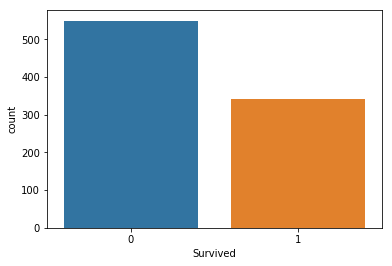

In [8]:
sobreviveu = (df_train['Survived'] == 1).sum()/df_train.shape[0]
print('Fração de sobreviventes: %0.2f ' % sobreviveu)  
print('Fração de falecidos: %0.2f ' % (1-sobreviveu))
sns.countplot(x='Survived', data=df_train);

* O sistema é considerado balanceado.

### Relação entre o gênero e o número de sobreviventes.

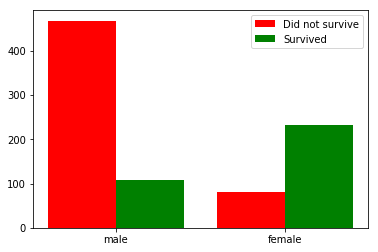

In [9]:
male = [0,0]; female = [0,0]; surv_bar = [0,0]
color_bar = ['r', 'g']; bar_pos = [-0.4,0.0,0.6,1.0]
bar_width = 0.4

for i in [0,1]:
    male[i] = (df_train[df_train['Survived'] == i]['Sex'] == 'male').sum()
    female[i] = (df_train[df_train['Survived'] == i]['Sex'] == 'female').sum()
    surv_bar[i] = plt.bar(bar_pos[i], male[i], width = bar_width, color = color_bar[i])
    plt.bar(bar_pos[i+2], female[i], width = bar_width, color = color_bar[i])

plt.xticks([-0.2,0.8], ['male', 'female'])  
plt.legend((surv_bar[0],surv_bar[1]),('Did not survive', 'Survived'), framealpha = 0.8);

In [10]:
print("Fração de mulheres sobreviventes: %0.2f " % (female[1]/(female[1]+female[0])))
print("Fração de homens sobreviventes: %0.2f " % (male[1]/(male[1]+male[0])))

Fração de mulheres sobreviventes: 0.74 
Fração de homens sobreviventes: 0.19 


* Verificamos que a maioria dos sobreviventes foram mulheres. 

In [11]:
# Módulo para análise exploratória com gráficos
import matplotlib.style
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='rgbcmyk')

def bar_graph(feature):
    if df_train[feature].nunique() < 8:
        survived = df_train[df_train['Survived']==1][feature].value_counts()
        deceased = df_train[df_train['Survived']==0][feature].value_counts()
        df = pd.DataFrame([survived,deceased])
        df.index = ['Survived','Not survived']
        df.plot(kind='bar',stacked=False, figsize=(6.67,5))
        plt.xticks(rotation=0);
        print("Survived:\n", survived/df_train.shape[0])
        print("Not survived:\n", deceased/df_train.shape[0])
    else:
        df_train.groupby('Survived')[feature].hist(alpha=0.5, density = True, figsize=(6.67,5))
        plt.xlabel(feature)
        plt.legend(["Not survived", "Survived"],framealpha = 0.8);
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.title(feature)    

### Sobreviventes pela classe

Survived:
 1   0.153
3   0.134
2   0.098
Name: Pclass, dtype: float64
Not survived:
 3   0.418
2   0.109
1   0.090
Name: Pclass, dtype: float64


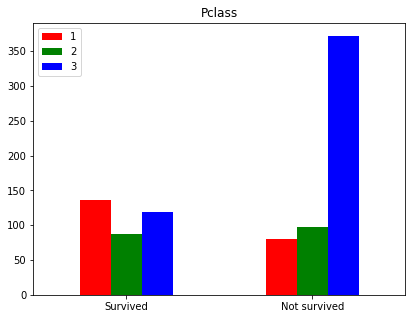

In [12]:
bar_graph('Pclass')

### Verificando a idade dos sobreviventes 

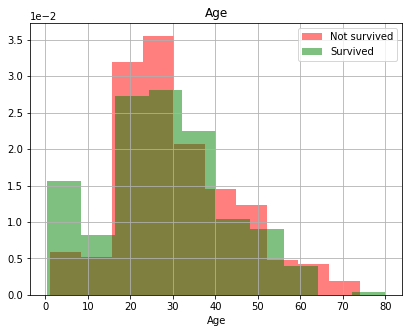

In [13]:
bar_graph('Age')

### Verificando a correlação entre as propriedades

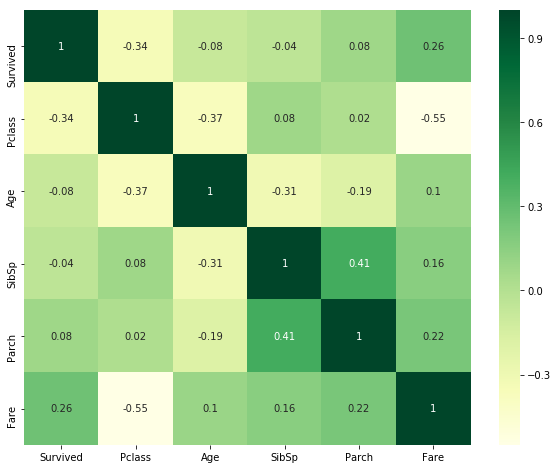

In [14]:
cor_matrix = df_train.drop(columns=['PassengerId']).corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(10,8));
sns.heatmap(cor_matrix, annot=True, cmap="YlGn");

## Removendo dados irrelevantes

Observa-se que nos dados de teste, apareceu valores NaN para 'Cabin'. Além de conter NaN nos testes, esta informação poderia sugerir que, conforme o número da cabine, o passageiro pode ser de primeira, segunda, ou terceira classe, o que permite especular que a primeira classe teria acesso fácil para sair do navio. No entanto, já existe uma coluna classificando o passageiro pela classe, tornado o número da cabine uma informação redundante.

Também é claro que o 'Name' e o número do 'Ticket' não exerceriam qualquer influência na pessoa se salvar do naufrágio.

Removemos estas três.

In [15]:
df_train.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
df_infer.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

## One-hot encoding

Na análise acima, observamos que o gênero foi importante para definir quem iria se salvar. Como esta variável é categórica, male e female, precisamos construir uma tabela binária para classificar cada um dos gêneros. A construção desta tabela binária chama-se *One-hot enconding*. 

In [16]:
train = pd.get_dummies(df_train)
infer = pd.get_dummies(df_infer)

In [17]:
train = pd.concat([train, pd.get_dummies(train['Pclass'], prefix='Pclass')], axis=1)
train = train.drop('Pclass', axis=1)
infer = pd.concat([infer, pd.get_dummies(infer['Pclass'], prefix='Pclass')], axis=1)
infer = infer.drop('Pclass', axis=1)

In [18]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000,1,0,7.250,0,1,0,0,1,0,0,1
1,2,1,38.000,1,0,71.283,1,0,1,0,0,1,0,0
2,3,1,26.000,0,0,7.925,1,0,0,0,1,0,0,1
3,4,1,35.000,1,0,53.100,1,0,0,0,1,1,0,0
4,5,0,35.000,0,0,8.050,0,1,0,0,1,0,0,1


In [19]:
infer.head()

,PassengerId,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,892,34.500,0,0,7.829,0,1,0,1,0,0,0,1
1,893,47.000,1,0,7.000,1,0,0,0,1,0,0,1
2,894,62.000,0,0,9.688,0,1,0,1,0,0,1,0
3,895,27.000,0,0,8.662,0,1,0,0,1,0,0,1
4,896,22.000,1,1,12.287,1,0,0,0,1,0,0,1


## Tratando os missing numbers (NaN)

In [20]:
# Verificando o numero de missing numbers com .isnull()
train.isnull().sum().sort_values(ascending = False)

Age            177
Pclass_3         0
Pclass_2         0
Pclass_1         0
Embarked_S       0
Embarked_Q       0
Embarked_C       0
Sex_male         0
Sex_female       0
Fare             0
Parch            0
SibSp            0
Survived         0
PassengerId      0
dtype: int64

In [21]:
infer.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
Pclass_3        0
Pclass_2        0
Pclass_1        0
Embarked_S      0
Embarked_Q      0
Embarked_C      0
Sex_male        0
Sex_female      0
Parch           0
SibSp           0
PassengerId     0
dtype: int64

In [22]:
# Preenchendo os valores nulos das idades com a media
train['Age'].fillna(train['Age'].mean(), inplace = True)
infer['Age'].fillna(infer['Age'].mean(), inplace = True)

In [23]:
infer['Fare'].fillna(infer['Fare'].mean(), inplace= True)

In [24]:
# Verificando a substituição
train.isnull().sum().sort_values(ascending = False)

Pclass_3       0
Pclass_2       0
Pclass_1       0
Embarked_S     0
Embarked_Q     0
Embarked_C     0
Sex_male       0
Sex_female     0
Fare           0
Parch          0
SibSp          0
Age            0
Survived       0
PassengerId    0
dtype: int64

In [25]:
infer.isnull().sum().sort_values(ascending = False)

Pclass_3       0
Pclass_2       0
Pclass_1       0
Embarked_S     0
Embarked_Q     0
Embarked_C     0
Sex_male       0
Sex_female     0
Fare           0
Parch          0
SibSp          0
Age            0
PassengerId    0
dtype: int64

## Classificador:  Machine Learning

### Separando os features e targets:

In [26]:
X = train.drop(['PassengerId','Survived'], axis=1)
y = train['Survived']

### Separando os dados para treino e validação 

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# shuffle=True é padrão, o arquivo de dados é embaralhado antes de separar
# em treino e teste, não precisa declarar.

### Definindo o classificador

In [28]:
from sklearn.tree import DecisionTreeClassifier
# Definindo os parâmetros para o classificador
param = {} # Criando um dictionary para lista de parâmetros
param['max_depth'] = 5
param['max_features'] = 3
param['random_state'] = 42 # Este valor tem que ser o mesmo para todos os notebooks. 
param['criterion'] = 'entropy'

clf = DecisionTreeClassifier(**param)

### Treinando o  modelo.

In [29]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [30]:
# Verificando o score dos dados de treino
print("Precisão do modelo: {:.2f}%".format(clf.score(X_train,y_train)*100))

Precisão do modelo: 82.44%


In [31]:
importantes = clf.feature_importances_
indices = np.argsort(importantes)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[f], importantes[indices[f]]))

Feature ranking:
1. Age (0.527513)
2. SibSp (0.099988)
3. Parch (0.093963)
4. Fare (0.087931)
5. Sex_female (0.069181)
6. Sex_male (0.049888)
7. Embarked_C (0.036528)
8. Embarked_Q (0.011681)
9. Embarked_S (0.008298)
10. Pclass_1 (0.007979)
11. Pclass_2 (0.007050)
12. Pclass_3 (0.000000)


### Testando o modelo

In [32]:
predictions = clf.predict(X_test)

### Medindo a acurácia

In [33]:
from sklearn.metrics import accuracy_score
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, predictions)*100))

Accuracy: 83.80%


### Visualizando a árvore de decisão

In [34]:
from sklearn.externals.six import StringIO
from sklearn import tree
import pydotplus
dot_data = StringIO()
tree.export_graphviz(clf,
                     out_file=dot_data,
                     feature_names=list(X.columns),
                     class_names = ['Not Survived', 'Survived'],
                     filled=True, rounded=True,
                     impurity=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Decision_tree_Titanic.png")

True

### Inferindo resultado com os dados de teste.


In [35]:
Inference = pd.DataFrame()  #Criando o dataframe
Inference['PassengerId'] = infer['PassengerId'] #incluindo o ID dos passageiros
Inference['Survived'] = clf.predict(infer.drop('PassengerId', axis=1))      #incluindo o resultado do treino do modelo

## Salvando os dados para submissão no Kaggle

In [36]:
Inference.to_csv('submission.csv', index=False)

* Kaggle score: `0.7799`